In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.6 MB/s eta 0:00:00


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import json
import nltk
import pandas as pd
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
# from datasets import Dataset
import pyarrow as pa
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Package sentence tokenizer
nltk.download('punkt')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Import Dataset

In [ ]:
# Importing the dataset
with open('/content/drive/MyDrive/chatbot-bert/kampus_merdeka_cmplt.json') as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
data.head(10)

,patterns,tags
0,hai,greeting
1,punten,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
5,pagi,greeting
6,siang,greeting
7,sore,greeting
8,malam,greeting
9,permisi,greeting


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   patterns  605 non-null    object
 1   tags      605 non-null    object
dtypes: object(2)
memory usage: 9.6+ KB


In [ ]:
data.describe()

,patterns,tags
count,605,605
unique,600,60
top,Cara mendaftar IISMA?,mitra_IISMA
freq,2,12


In [ ]:
data.isnull().sum()

patterns    0
tags        0
dtype: int64

Exploratory Data Analysis

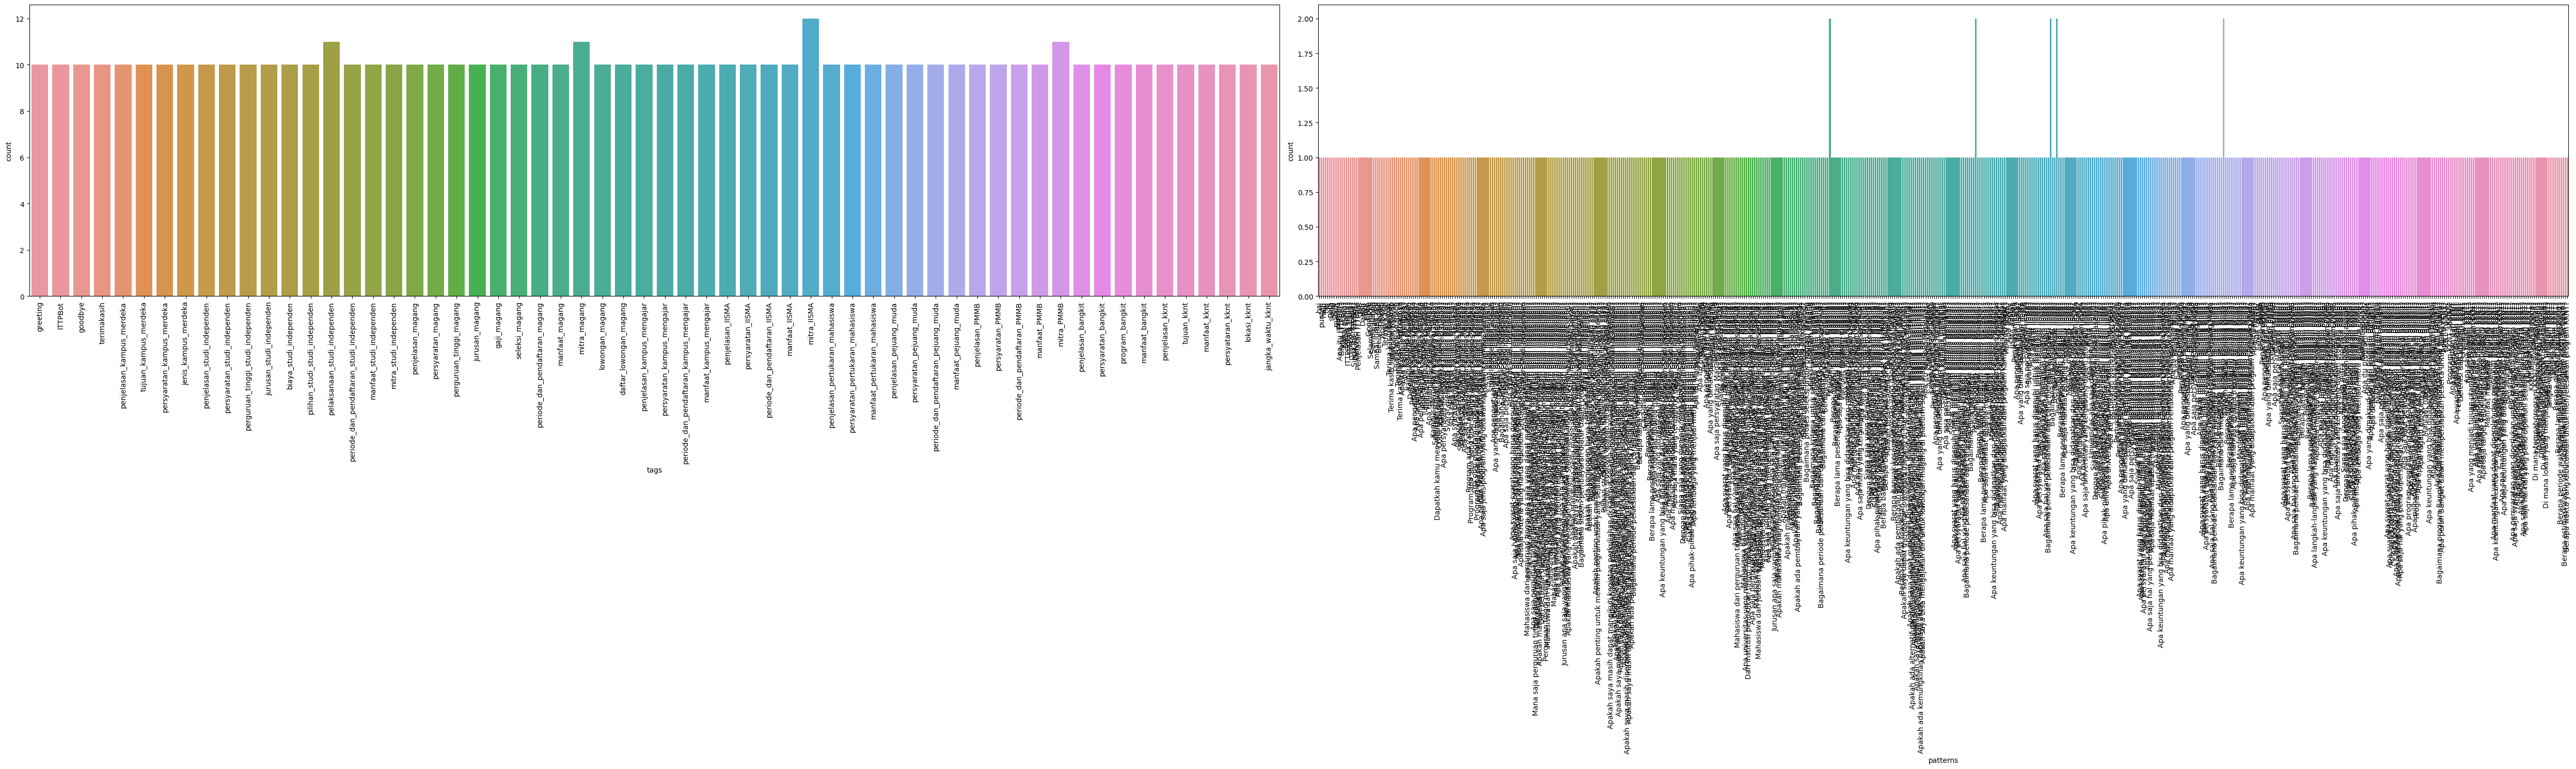

In [ ]:
cat_vars = ['tags', 'patterns']

# create figure with subplots
fig, axs = plt.subplots(ncols=2, figsize=(50, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [ ]:
print(f"{'tags'}: {data['tags'].unique()}")

tags: ['greeting' 'ITTPBot' 'goodbye' 'terimakasih' 'penjelasan_kampus_merdeka'
 'tujuan_kampus_merdeka' 'persyaratan_kampus_merdeka'
 'jenis_kampus_merdeka' 'penjelasan_studi_independen'
 'persyaratan_studi_independen' 'perguruan_tinggi_studi_independen'
 'jurusan_studi_independen' 'biaya_studi_independen'
 'pilihan_studi_studi_independen' 'pelaksanaan_studi_independen'
 'periode_dan_pendaftaran_studi_independen' 'manfaat_studi_independen'
 'mitra_studi_independen' 'penjelasan_magang' 'persyaratan_magang'
 'perguruan_tinggi_magang' 'jurusan_magang' 'gaji_magang' 'seleksi_magang'
 'periode_dan_pendaftaran_magang' 'manfaat_magang' 'mitra_magang'
 'lowongan_magang' 'daftar_lowongan_magang' 'penjelasan_kampus_mengajar'
 'persyaratan_kampus_mengajar' 'periode_dan_pendaftaran_kampus_mengajar'
 'manfaat_kampus_mengajar' 'penjelasan_IISMA' 'persyaratan_IISMA'
 'periode_dan_pendaftaran_IISMA' 'manfaat_IISMA' 'mitra_IISMA'
 'penjelasan_pertukaran_mahasiswa' 'persyaratan_pertukaran_mahasiswa'
 '

Word Cloud

In [ ]:
# creating the text variable
text_wc = " ".join(title for title in data['patterns'])
text_wc

'hai punten halo hei hi pagi siang sore malam permisi ittpbot? ittpbot? siapa? kamu? ittpbot siapa? ittpbot siapa? ittpbot apa? ittpbot? defenisi ittpbot penjelasan ittpbot dah dadah bye byee good bye selamat tinggal jumpa see you jumpa see you again thanks thank you terima kasih makasih terima kasih terima kasih membantu makasih thank you so much terima kasih ya terima kasih bantuannya kampus merdeka? kampus merdeka? kampus merdeka? kampus merdeka defenisi kampus merdeka? pengertian kampus merdeka pengertian kampus merdeka? defenisi kampus merdeka? penjelasan kampus merdeka penjelasan kampus merdeka tujuan kampus merdeka? tujuan kampus merdeka tujuan kampus merdeka? tujuan kampus merdeka? tujuan kampus merdeka kampus merdeka tujuan? sebutkan tujuan kampus merdeka? dapatkah tujuan kampus merdeka? coba sebutkan tujuan kampus merdeka? kampus merdeka memiliki tujuan? persyaratan mengikuti kampus merdeka? syarat kampus merdeka? syarat mengikuti kampus merdeka? syarat kampus merdeka? syarat

In [ ]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text_wc)
# saving the image
word_cloud.to_file('/content/drive/MyDrive/chatbot-bert/word-cloud.png')

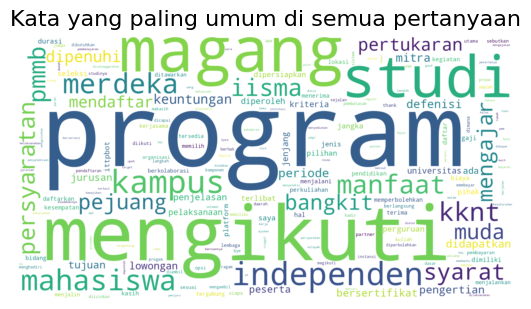

In [ ]:
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Kata yang paling umum di semua pertanyaan',fontdict={'size': 16, 'color': 'black',
                                  'verticalalignment': 'bottom'})
plt.axis("off")
plt.show()

## Preprocessing

In [ ]:
# define stopword for bahasa
file_path = '/content/drive/MyDrive/chatbot-bert/stopwordbahasa.csv'
df = pd.read_csv(file_path)

# Ubah DataFrame menjadi list array menggunakan fungsi values
stop_words = df.values.flatten().tolist()

def remove_stopwords(text):

    #Lowercase the text
    text = text.lower()

    #Split the text into words
    words = text.split()

    # Perform stemming
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# from transformers import BertTokenizer, TFBertModel
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = TFBertModel.from_pretrained("bert-base-uncased")
# text = "Replace me by any text you'd like."
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# output

In [ ]:
data['patterns'] = data['patterns'].apply(remove_stopwords)

In [ ]:
data['patterns']

0                                              hai
1                                           punten
2                                             halo
3                                              hei
4                                               hi
                          ...                     
600                      program kknt berlangsung?
601                          periode program kknt?
602                 lamakah program kknt berjalan?
603    estimasi dibutuhkan mengikuti program kknt?
604         dibutuhkan menyelesaikan program kknt?
Name: patterns, Length: 605, dtype: object

In [ ]:
X = dict(tokenizer(data['patterns'].to_list(), padding=True, truncation=True, max_length=50, return_tensors='tf'))
y, unique_label = pd.factorize(data['tags'])

In [ ]:
X

{'input_ids': <tf.Tensor: shape=(605, 33), dtype=int32, numpy=
 array([[  101, 15030,   102, ...,     0,     0,     0],
        [  101, 18975,  2368, ...,     0,     0,     0],
        [  101, 17201,   102, ...,     0,     0,     0],
        ...,
        [  101, 18832,  2912, ...,     0,     0,     0],
        [  101,  9765,  9581, ...,     0,     0,     0],
        [  101,  4487,  8569, ...,     0,     0,     0]], dtype=int32)>,
 'token_type_ids': <tf.Tensor: shape=(605, 33), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>,
 'attention_mask': <tf.Tensor: shape=(605, 33), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0,

In [ ]:
class_names = data['tags'].unique()
len(class_names)

60

## Bert Model

In [ ]:
# Define a TensorFlow model
model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train the TensorFlow model on the dataset
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=model.hf_compute_loss,
    metrics=['accuracy']
)

In [ ]:
model.fit(X, y,epochs=15)

Epoch 1/15
19/19 [==============================] - 321s 15s/step - loss: 4.1201 - accuracy: 0.0149
Epoch 2/15
19/19 [==============================] - 278s 15s/step - loss: 3.8357 - accuracy: 0.0975
Epoch 3/15
19/19 [==============================] - 284s 15s/step - loss: 3.3930 - accuracy: 0.2744
Epoch 4/15
19/19 [==============================] - 288s 15s/step - loss: 2.9315 - accuracy: 0.4793
Epoch 5/15
19/19 [==============================] - 283s 15s/step - loss: 2.5280 - accuracy: 0.6463
Epoch 6/15
19/19 [==============================] - 274s 15s/step - loss: 2.1516 - accuracy: 0.7901
Epoch 7/15
19/19 [==============================] - 273s 14s/step - loss: 1.8042 - accuracy: 0.8529
Epoch 8/15
19/19 [==============================] - 292s 15s/step - loss: 1.5024 - accuracy: 0.8959
Epoch 9/15
19/19 [==============================] - 290s 15s/step - loss: 1.2365 - accuracy: 0.9455
Epoch 10/15
19/19 [==============================] - 288s 15s/step - loss: 1.0201 - accuracy: 0.9653

Evaluasi Model


In [ ]:
model.evaluate(X, y)

19/19 [==============================] - 85s 4s/step - loss: 0.2647 - accuracy: 0.9967


[0.26469743251800537, 0.9966942071914673]

Berdasarkan hasil evaluasi model, didapatkan akurasi sebesar 99%

In [ ]:
# text = remove_stopwords("halo?")
# new_X = dict(tokenizer(text, padding=True, truncation=True, max_length=50, return_tensors='tf'))

# predictions = model.predict(new_X,verbose=0)
# class_names[tf.argmax(predictions['logits'][0].tolist())]

## Demo Chatbot

In [ ]:
import random

# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('Kamu : ')

  prediction_input = remove_stopwords(prediction_input)
  texts_p.append(prediction_input)

  new_X = dict(tokenizer(prediction_input, padding=True, truncation=True, max_length=50, return_tensors='tf'))

  # Mendapatkan hasil keluaran pada model
  predictions = model.predict(new_X,verbose=0)
  class_names[tf.argmax(predictions['logits'][0].tolist())]

  # Menemukan respon sesuai data tag dan memainkan voice bot
  response_tag = class_names[tf.argmax(predictions['logits'][0].tolist())]
  print("Bot : ", random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

Kamu : apa itu deep learning?
Bot :  ITTPBot adalah aplikasi chatbot informasi layanan akademik khusus program Merdeka Belajar Kampus Merdeka
Kamu : apa itu AI
Bot :  Halo! Saya ITTPBot, salam kenal ya! Mau tau tentang kampus merdeka?
Kamu : bye
Bot :  Good bye!


### Similarity

In [ ]:
def calculate_similarity(text1, text2):
    # Tokenisasi teks
    inputs = dict(tokenizer(text1, text2, return_tensors="tf", padding=True, truncation=True, max_length=50))

    # Lakukan inferensi untuk mendapatkan nilai similarity (output logit)
    outputs = model(inputs)
    # print(outputs)
    logits = outputs.logits
    # print(logits)

    # Konversi nilai logit menjadi nilai similarity dengan softmax
    similarity = tf.nn.softmax(logits, axis=1).numpy()[0][1]

    return similarity

In [ ]:
text1 = "apa itu deep learning?"
text2 = "siapa kamu?"

similarity_score = calculate_similarity(text1, text2)
print("Similarity score:", similarity_score)

Similarity score: 0.5520134


In [ ]:
text1 = "apa itu AI?"
text2 = "siapa kamu?"

similarity_score = calculate_similarity(text1, text2)
print("Similarity score:", similarity_score)

Similarity score: 0.5343111


In [ ]:
text1 = "apa itu AI?"
text2 = "apa itu kampus merdeka?"

similarity_score = calculate_similarity(text1, text2)
print("Similarity score:", similarity_score)

Similarity score: 0.010094157


Karena label ITTPBot memiliki similarity yang lebih tinggi dibanding penjelasan kampus merdeka, maka chatbot akan memberi respon sesuai label ITTPBot terhadap pertanyaan "apa itu deep learning, dan apa itu AI"

In [ ]:
saved_directory = '/content/drive/MyDrive/chatbot-bert/model'

tokenizer.save_pretrained(saved_directory)
model.save_pretrained(saved_directory)